# SOLUÇÃO DO ENTREGÁVEL
## Estatística Avançada | Data Expert | DNC

## 0 PRELIMINARES

### 0.1 Carregamento das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy as pt
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 0.2 Carregamento do dataset

In [ ]:
url = 'https://github.com/qymera0/dncPython/blob/main/estatAvan/diamonds.csv?raw=true'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 0.3 Remoção das colunas não necessárias

In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1 EDA

### Questão 01 - Qual é a média da variável 'carat' ?

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


A média da variável 'carat' é igual a 0.797940.

### Questão 02 - Qual é a correlação entre as variáveis 'price' e 'deph'?

In [ ]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


A correlação entre as variáveis 'price' e 'depth' é de -0.010647

## 2 PRÉ-PROCESSAMENTO DOS DADOS

### Questão 3 - Após o escalonamento das variáveis numéricas, qual é o valor máximo da variável ‘table’?

In [ ]:
# Separar somente as variáveis numéricas
dfNum = df.select_dtypes(include = 'number').drop('price', axis = 1)

In [ ]:
# Função para o escalonamento das variáveis contínuas

def feat_scale(X):

  # Calcular a média de todas as variáveis
  mu = np.mean(X, axis = 0)

  # Calcular o devio padrão de todas as variáveis
  sigma = np.std(X, axis=0, ddof=1)

  # Fazer os escalonamento das variáveis
  xNorm = (X - mu)/sigma

  return xNorm

In [ ]:
# Escalonamento das variáveis
dfNum = feat_scale(dfNum)

In [ ]:
dfNum.describe()

,carat,depth,table,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,3.774170e-14,5.528923e-13,-3.621533e-14,1.177763e-13,8.638663e-14,-2.522116e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.261446e+00,-1.308748e+01,-6.470013e+00,-5.109073e+00,-5.020884e+00,-5.014510e+00
25%,-8.395154e-01,-5.231005e-01,-6.521325e-01,-9.103164e-01,-8.882717e-01,-8.909378e-01
50%,-2.066190e-01,3.531645e-02,-2.046032e-01,-2.777527e-02,-2.147379e-02,-1.237607e-02
75%,5.106635e-01,5.239313e-01,6.904554e-01,7.210475e-01,7.052356e-01,7.103118e-01
max,8.885992e+00,1.204128e+01,1.680151e+01,4.465161e+00,4.654922e+01,4.004720e+01


Após o escalonamento, o maior valor da variável 'table' é 16.80.

### Questão 4 - Após a ‘dummyficação’ das variáveis categóricas, quantas colunas existem em um dataset com somente variáveis desse tipo?

In [ ]:
# Separar somente as variáveis categóricas
dfCat = df.loc[:, ~df.columns.isin(dfNum.columns)].drop('price', axis = 1)

In [ ]:
# Transforma as variáveis de text em 'categorias'
dfCat = dfCat.astype('category')

In [ ]:
dfCat = pd.get_dummies(dfCat, drop_first = True)

In [ ]:
dfCat.shape

(53940, 17)

Após a dummyficação das variáveis categóricas, existirão 17 variáveis. OBS: atentar-se o argumento 'drop_first'.

### Questão 5 - A distribuição da resposta ‘price’ é normal e não precisa ser transformada.

Text(0, 0.5, 'Frequência')

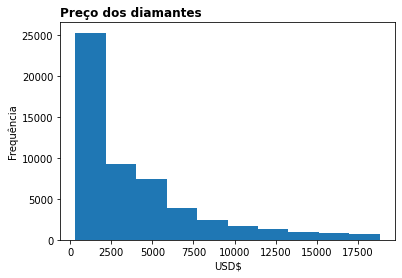

In [ ]:
# Histograma da variável 'price'
fig = plt.figure()

plt.hist(df['price'])

plt.title('Preço dos diamantes', loc = 'left', fontweight = 'bold')

plt.xlabel('USD$')

plt.ylabel('Frequência')

In [ ]:
# Teste de normalidade
kStat, kPvalue = stats.kstest(df['price'], cdf = 'norm')

In [ ]:
print('Estatística de teste:', kStat, "\n", 'p-value:', kPvalue)

Estatística de teste: 1.0 
 p-value: 0.0


Falso: a resposta é não normal.

## 4 AJUSTE DO MODELO

### Questão 6. Ao separar o dataset em dois pedaços, o de treinamento e o de teste, quantas linhas possuirá o dataset de teste? (Utilize uma proporção de 20% e argumento random_state = 123456) Dica: concatene os datasets e faça a matriz do modelo antes de fazer a separação entre treinamento e teste.

In [ ]:
# Concatenar todos os dados
dfFull = pd.concat([dfNum, dfCat, df['price']], axis = 1)

In [ ]:
dfFull.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-1.198157,-0.174090,-1.099662,-1.587823,-1.536181,-1.571115,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,326
1,-1.240350,-1.360726,1.585514,-1.641310,-1.658759,-1.741159,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,326
2,-1.198157,-3.384987,3.375631,-1.498677,-1.457382,-1.741159,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,327
3,-1.071577,0.454129,0.242926,-1.364959,-1.317293,-1.287708,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,334
4,-1.029384,1.082348,0.242926,-1.240155,-1.212227,-1.117663,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,335


In [ ]:
# Função para escrever a fórmula
def ols_formula(df, dependent_var, *excluded_rows):

  # Listar o nome das colunas do dataframe
  dfCols = list(df.columns.values)

  # Remover a variável dependente
  dfCols.remove(dependent_var)

  # Remover as variáveis excluídas
  for col in excluded_rows:
    dfCols.remove(col)

  # Retornar a fórmula
  return dependent_var + ' ~ ' + ' + '.join(dfCols)

In [ ]:
ols_formula(dfFull, 'price')

'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [ ]:
# Renomear a coluna 'cut_Very Good' para remover o espaço
dfFull = dfFull.rename(columns={'cut_Very Good' : 'cut_VeryGood'})

In [ ]:
# Criação da matriz do modelo
y, X = pt.dmatrices(ols_formula(dfFull, 'price'), data = dfFull , return_type='dataframe')

In [ ]:
# Separação dos datasets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 123456)

In [ ]:
# Reset index
xTrain.reset_index(drop=True, inplace=True)
xTest.reset_index(drop=True, inplace=True)
yTrain.reset_index(drop=True, inplace=True)
yTest.reset_index(drop=True, inplace=True)

In [ ]:
xTest.shape

(10788, 24)

A quantidade de linhas no dataset de teste é 10788.

### Questão 7 - Utilizando o método dos mínimos quadrados e ajustando o modelo com o logaritmo natural da resposta ‘price’ e os dados de ajuste, qual é a variável que tem o maior valor para a estatística ‘t’. (OBS: desconsidere o ‘intercept’).

In [ ]:
# Ajustar o modelo
reg1 = sm.OLS(np.log(yTrain), xTrain)
reg1fit = reg1.fit()
print(reg1fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 5.655e+04
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:01:41   Log-Likelihood:                 12290.
No. Observations:               43152   AIC:                        -2.453e+04
Df Residuals:                   43128   BIC:                        -2.432e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1184      0.009    782.126   

A variável que tem o maior valor absoluto para a estatística 't' é a 'x', com t = 205.705

### Questão 8 - Para o modelo ajustado na questão 07, qual é a variável que possui o maior VIF?

In [ ]:
# Determinação do VIF para o modelo ajustado
pd.DataFrame({'Variaveis': xTrain.columns[1:],
              'VIF': [variance_inflation_factor(xTrain.values, i+1) for i in range(len(xTrain.columns[1:]))]})

,Variaveis,VIF
0,carat,21.714137
1,depth,1.712892
2,table,1.783268
3,x,50.908609
4,y,16.921473
5,z,20.059420
6,cut_Good,3.943117
7,cut_Ideal,11.397405
8,cut_Premium,8.408910
9,cut_VeryGood,7.698138


A variável que possui o maior valor de VIF é a 'x', com VIF de 50.9.

### Questão 9 - Após remover todas as variáveis para manter os VIF´s em no máximo 5, quantas variáveis sobraram no modelo? OBS: desconsidere o intercept. (Dica, comece removendo, uma por uma, as variáveis com maior VIF)

In [ ]:
# Variáveis para 'dropar'
var = ['x', 'clarity_SI1', 'z', 'cut_Ideal', 'carat']

# Cálculo do VIF
pd.DataFrame({'Variaveis': xTrain.drop(var, axis = 1).columns[1:],
              'VIF': [variance_inflation_factor(xTrain.drop(var, axis = 1).values, i+1) for i in range(len(xTrain.drop(var, axis = 1).columns[1:]))]})

,Variaveis,VIF
0,depth,1.172445
1,table,1.535214
2,y,1.282658
3,cut_Good,1.310436
4,cut_Premium,1.553306
5,cut_VeryGood,1.348768
6,color_E,2.002190
7,color_F,2.004205
8,color_G,2.188579
9,color_H,1.944377


Após a remoção das variáveis x, clarity_SI1, z, cut_Ideal, carat, sobraram 18 variáveis.

## 5 QUALIDADE DE AJUSTE

### Questão 10. Qual é o R^2 para os dados de teste com o modelo sem as variáveis removidas na questão 9?

In [ ]:
# Reajustar o modelo sem as variáveis com alto VIF.
reg2 = sm.OLS(np.log(yTrain), xTrain.drop(var, axis = 1))
reg2fit = reg2.fit()
print(reg2fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 2.069e+04
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:01:44   Log-Likelihood:                -13037.
No. Observations:               43152   AIC:                         2.611e+04
Df Residuals:                   43133   BIC:                         2.628e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.8353      0.006   1408.633   

In [ ]:
reg2fit.predict(xTest.drop(var, axis = 1))

0        7.920652
1        9.380046
2        7.205302
3        8.737650
4        7.270200
           ...   
10783    6.713603
10784    8.352212
10785    7.854500
10786    7.709704
10787    7.761917
Length: 10788, dtype: float64

In [ ]:
# Previsão dos dados de teste
lnYPred = pd.concat([np.log(yTest), reg2fit.predict(xTest.drop(var, axis = 1))], axis = 1)
lnYPred.columns = ['price', 'pricePred']
lnYPred.head()

,price,pricePred
0,7.989560,7.920652
1,9.259035,9.380046
2,7.064759,7.205302
3,9.287024,8.737650
4,7.111512,7.270200


In [ ]:
# Determinação do R^2
print('Rquadrado', metrics.r2_score(lnYPred['price'], lnYPred['pricePred']))

Rquadrado 0.9602537286233841


O R^2 para os dados de teste é 0.96

## 6 ANÁLISE DE RESÍDUOS

### Questão 11 - Utilizando os dados de teste, faça a análise de resíduos e responda: eles estão de acordo com a hipótese para a regressão linear?

In [ ]:
# Cálculo dos resíduos
lnYPred['res'] = lnYPred['price'] - lnYPred['pricePred']

Text(0, 0.5, 'Frequência')

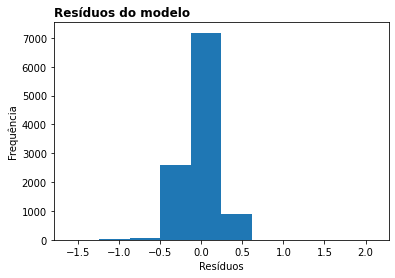

In [ ]:
# Distribuição dos resíduos
fig = plt.figure()

plt.hist(lnYPred['res'])

plt.title('Resíduos do modelo', loc = 'left', fontweight = 'bold')

plt.xlabel('Resíduos')

plt.ylabel('Frequência')


In [ ]:
# Teste de normalidade
kStat, kPvalue = stats.kstest(lnYPred['res'], cdf = 'norm')

In [ ]:
print('Estatística de teste:', kStat, "\n", 'p-value:', kPvalue)

Estatística de teste: 0.3413700175348071 
 p-value: 0.0


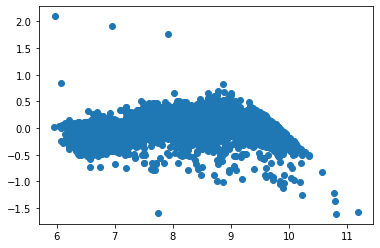

In [ ]:
# Homocedasticidade
fig = plt.figure()
plt.scatter(lnYPred['pricePred'], lnYPred['res'])

Apesar dos resíduos terem um distribuição centrada no zero, eles não são normais. Há também um claro comportamento de heterocedasticidade. Por isso, a resposta correta é a 'd': Não, os não são nem homocedásticos nem normais.

## 7 REGRESSÃO REGULARIZADA

### Questão 12 - Utilizando a regressão regularizada tipo “ridge” e o dataset com TODOS os regressores, qual dentre os seguintes valores de alpha deixa o modelo com o maior R^2 para os dados de teste?

In [ ]:
# lambida
alpha = [10]

In [ ]:
# Especificar o modelo
regRidge = Ridge(alpha = alpha)

# Fazer o fit do modelo
regRidge.fit(xTrain.drop(['Intercept'], axis=1), yTrain)

# Prever os valores para o dataset de teste
predYReg = pd.concat([yTest, pd.DataFrame(regRidge.predict(xTest.drop(['Intercept'], axis = 1)))], axis = 1)

# Mudar o nome das variáveis

predYReg.columns = ['price', 'predprice']

# Plotar o R2

print('Rquadrado', metrics.r2_score(predYReg['price'], predYReg['predprice']))


Rquadrado 0.9233817993266833


O valor do alpha que proporciona o maior valor de R^2 nos dados de teste é o 10.